In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score# 2. Cargar datos

In [2]:
# 2. Cargar datos
df = pd.read_csv("C:\\Users\\janin\\Downloads\\beisbol.csv")
print("Dimensiones:", df.shape)
print(df.head())

Dimensiones: (30, 4)
   Unnamed: 0  equipos  bateos  runs
0           0    Texas    5659   855
1           1   Boston    5710   875
2           2  Detroit    5563   787
3           3   Kansas    5672   730
4           4      St.    5532   762


       Unnamed: 0       bateos        runs
count   30.000000    30.000000   30.000000
mean    14.500000  5523.500000  693.600000
std      8.803408    79.873067   82.479088
min      0.000000  5417.000000  556.000000
25%      7.250000  5448.250000  629.000000
50%     14.500000  5515.500000  705.500000
75%     21.750000  5575.000000  734.000000
max     29.000000  5710.000000  875.000000


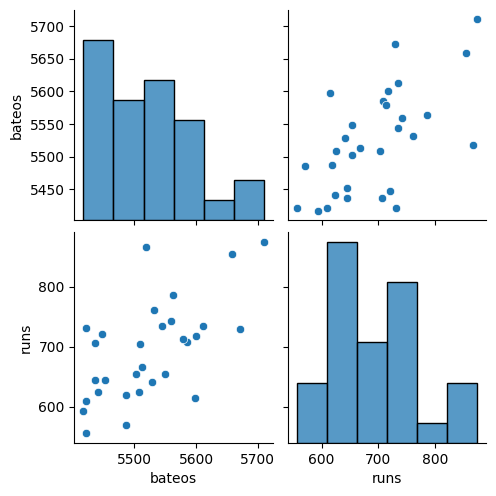

In [3]:
# 3. Exploración inicial
print(df.describe())
sns.pairplot(df[["bateos","runs"]])
plt.show()

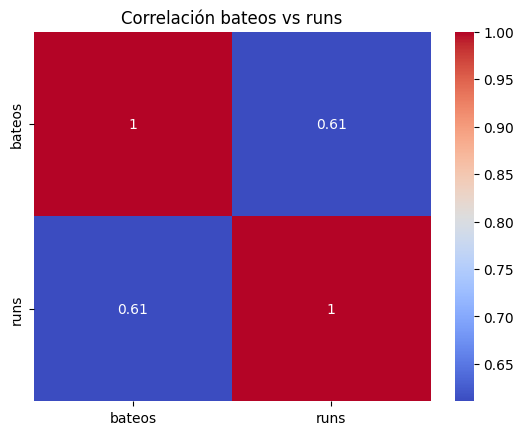

In [4]:
# 4. Correlación
sns.heatmap(df[["bateos","runs"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlación bateos vs runs")
plt.show()

In [5]:
# 5. Definir variables
X = df[["bateos"]]
y = df["runs"]

In [6]:
# 6. División train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# 7. Modelo base
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

In [9]:
# 8. Evaluación inicial
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

RMSE: 70.47532925544786
MAE: 62.90312945973665
R2: -0.4438757163659699


In [10]:
# 9. Optimización hiperparámetros
param_dist = {
    "n_estimators":[100,200,400,800],
    "learning_rate":[0.01,0.05,0.1,0.2],
    "max_depth":[2,3,4,5],
    "subsample":[0.7,0.85,1.0]
}
search = RandomizedSearchCV(gbr, param_dist, n_iter=20, cv=5, scoring="neg_root_mean_squared_error")
search.fit(X_train, y_train)
print("Mejores parámetros:", search.best_params_)

Mejores parámetros: {'subsample': 0.85, 'n_estimators': 100, 'max_depth': 2, 'learning_rate': 0.01}


In [12]:
# 10. Evaluación final
y_pred_opt = search.best_estimator_.predict(X_test)
rmse_opt = np.sqrt(mean_squared_error(y_test, y_pred_opt))
print("RMSE optimizado:", rmse_opt)

RMSE optimizado: 64.2110519338966


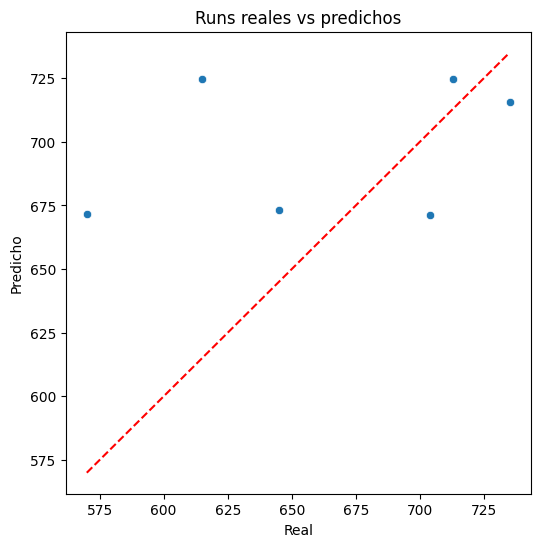

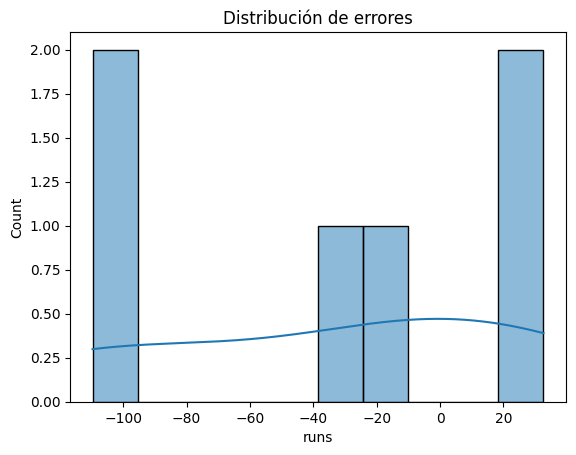

In [13]:
# 11. Gráficas comparativas
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_opt)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Real"); plt.ylabel("Predicho"); plt.title("Runs reales vs predichos")
plt.show()

sns.histplot(y_test - y_pred_opt, bins=10, kde=True)
plt.title("Distribución de errores")
plt.show()